In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [ ]:
df=pd.read_csv("/content/HeartDisease.csv")
df

NameError: name 'pd' is not defined

In [ ]:
df.isnull().sum()

,0
age,0
gender,0
chest_pain,0
rest_bps,0
cholestrol,0
fasting_blood_sugar,0
rest_ecg,0
thalach,0
exer_angina,0
old_peak,0


In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Axes: >

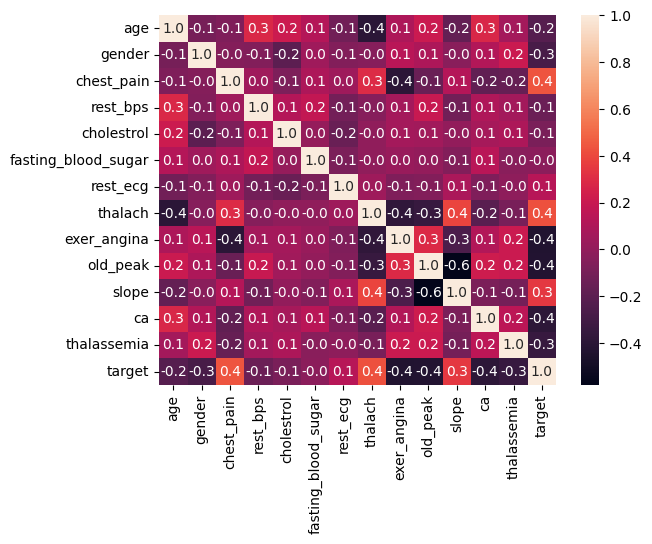

In [ ]:
sns.heatmap(df.corr(),annot=True,fmt='.1f')

<Axes: xlabel='target', ylabel='count'>

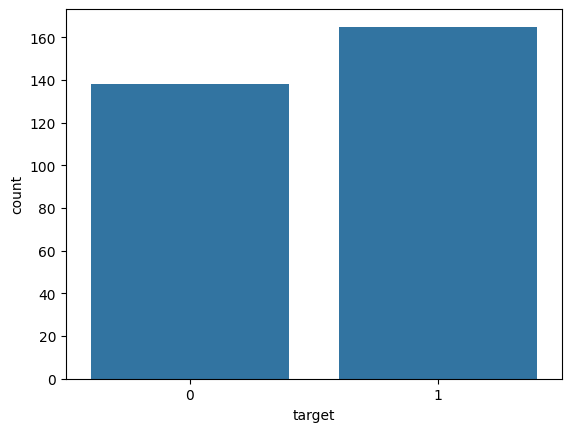

In [ ]:
sns.countplot(x='target',data=df)

In [ ]:
pd.value_counts(df['target'])

<ipython-input-10-0ae349e0e8e3>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['target'])


,count
target,
1,165
0,138


In [ ]:
x = df.drop('target',axis=1)
y = df['target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
model1 = LogisticRegression()
model1.fit(x_train,y_train)
y_predict = model1.predict(x_test)
accuracy_score(y_test,y_predict)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9016393442622951

In [ ]:
model2 = DecisionTreeClassifier()
model2.fit(x_train,y_train)
y_pred = model2.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
feature_importance = model2.feature_importances_
feature_importance_df = pd.DataFrame({'Feature':x.columns,'Importance':feature_importance})
feature_importance_df.sort_values('Importance',ascending=False)

NameError: name 'model2' is not defined

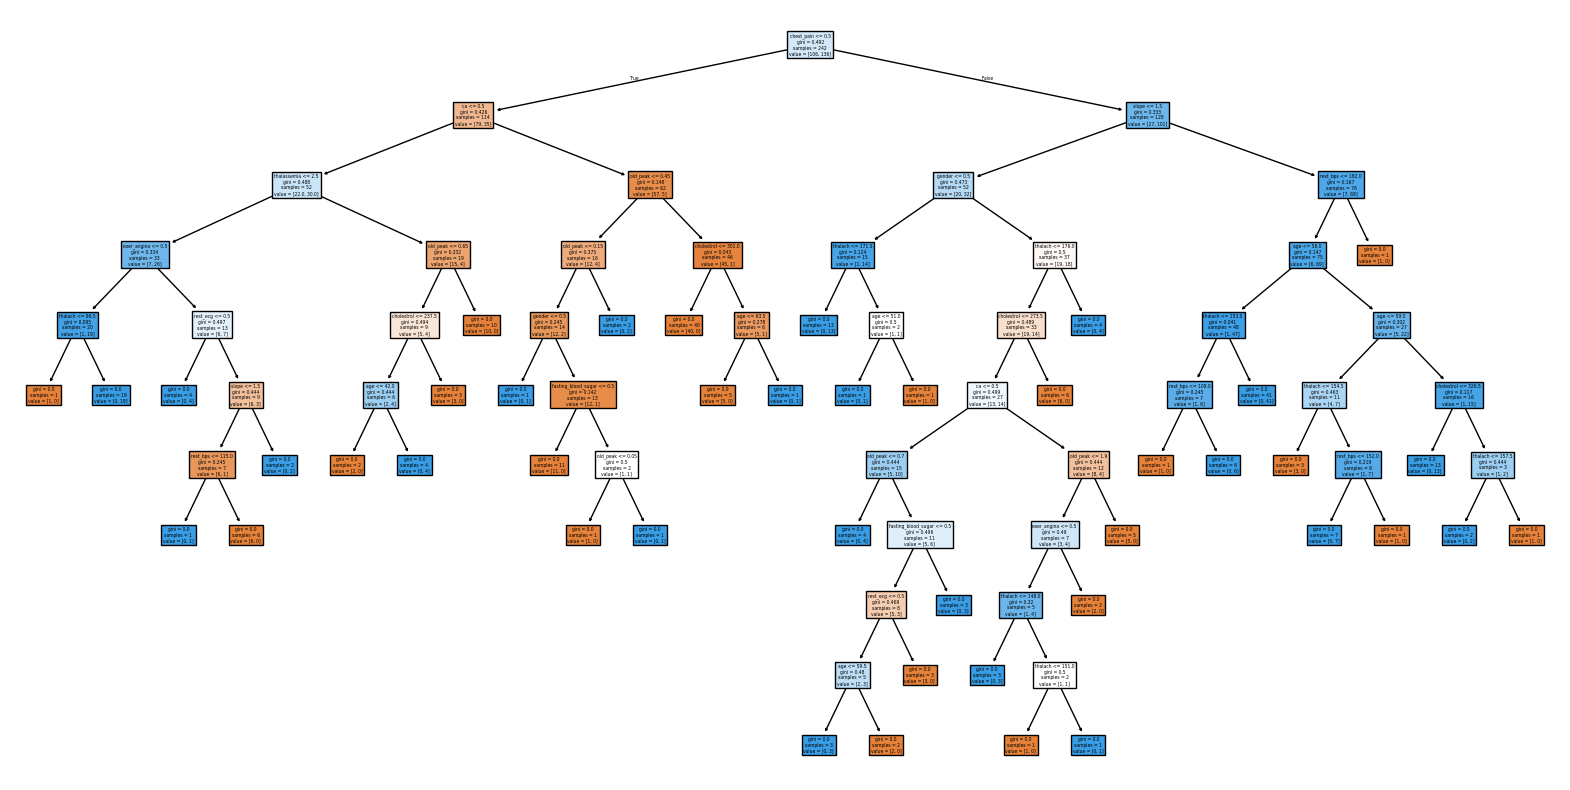

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(model2, filled=True, feature_names=x.columns)
plt.show()